**JOHN KENNEDY LANDAZURI SANDOVAL** TUNNING 1 OR 2

**Usaremos el set de MNIST para clasifiicar los digitos 1 y 2**


In [ ]:
!pip install --upgrade tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt

# MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Filter digits 1 and 2
train_filter = np.where((y_train == 1) | (y_train == 2))
test_filter = np.where((y_test == 1) | (y_test == 2))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Reshape the data to include the channel dimension (necessary for convolutional layers)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert labels to binary (1 and 2 -> 0 and 1)
y_train = np.where(y_train == 1, 0, 1)
y_test = np.where(y_test == 1, 0, 1)

# Create ImageDataGenerator for re-scaling and validation split
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# Create the generators for training and validation
train_generator = train_data_gen.flow(x_train, y_train, batch_size=32, subset='training')
validation_generator = train_data_gen.flow(x_train, y_train, batch_size=32, subset='validation')


In [26]:
from collections import Counter

# Contar las ocurrencias de cada clase
conteo_clases = Counter(y_train)
print(conteo_clases)

Counter({0: 6742, 1: 5958})


**underfitting: Un modelo pequeño con una sola capa densa puede causar underfitting.**

In [ ]:
from tensorflow.keras import models, layers


underfit_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

underfit_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])


history_underfit = underfit_model.fit(x_train, y_train,
                                      epochs=10,
                                      validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9381 - loss: 3.4905 - val_accuracy: 0.9917 - val_loss: 0.0981
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0582 - val_accuracy: 0.9922 - val_loss: 0.0383
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0336 - val_accuracy: 0.9903 - val_loss: 0.0399
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0277 - val_accuracy: 0.9866 - val_loss: 0.0391
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.0242 - val_accuracy: 0.9940 - val_loss: 0.0232
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0236 - val_accuracy: 0.9931 - val_loss: 0.0279
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0199 - val_accuracy: 0.9926 - val_loss: 0.0242
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0167 - val_accuracy: 0.9917 - val_

**Modelo más grande: Este modelo tendrá más capas, lo que puede causar overfitting si no se regula**

In [ ]:
from tensorflow.keras import models, layers

overfit_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Aplanar las imágenes de entrada
    layers.Dense(64, activation='relu'),       # Capa densa con 64 neuronas y activación ReLU
    layers.Dense(64, activation='relu'),       # Otra capa densa con 64 neuronas y activación ReLU
    layers.Dense(1, activation='sigmoid')      # Capa de salida con una neurona y activación sigmoide
])

overfit_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

history_overfit = overfit_model.fit(x_train, y_train,
                                    epochs=10,
                                    validation_data=(x_test, y_test))




Epoch 1/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9704 - loss: 0.6273 - val_accuracy: 0.9922 - val_loss: 0.1667
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9946 - loss: 0.0698 - val_accuracy: 0.9912 - val_loss: 0.0918
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9948 - loss: 0.0706 - val_accuracy: 0.9940 - val_loss: 0.1174
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9969 - loss: 0.0254 - val_accuracy: 0.9958 - val_loss: 0.1090
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0450 - val_accuracy: 0.9958 - val_loss: 0.2177
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9961 - loss: 0.0663 - val_accuracy: 0.9945 - val_loss: 0.1121
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9976 - loss: 0.0187 - val_accuracy: 0.9968 - val_loss: 0.0477
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9991 - loss: 0.0075 - val_accuracy: 0.

**Prevenir overfitting con Dropout y Early Stopping**

In [ ]:
import tensorflow as tf

regularized_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Aplanar las imágenes de entrada
    layers.Dense(64, activation='relu'),       # Capa densa con 64 neuronas y activación ReLU
    layers.Dropout(0.5),                      # Regularización con Dropout (50%)
    layers.Dense(64, activation='relu'),       # Otra capa densa con 64 neuronas y activación ReLU
    layers.Dropout(0.5),                      # Regularización con Dropout (50%)
    layers.Dense(1, activation='sigmoid')      # Capa de salida con una neurona y activación sigmoide
])

regularized_model.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

# Configurar EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history_regularized = regularized_model.fit(x_train, y_train,
                                            epochs=20,
                                            validation_data=(x_test, y_test),
                                            callbacks=[early_stopping])




Epoch 1/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8656 - loss: 9.8148 - val_accuracy: 0.9912 - val_loss: 0.1597
Epoch 2/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9480 - loss: 0.5207 - val_accuracy: 0.9917 - val_loss: 0.0508
Epoch 3/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9447 - loss: 0.2596 - val_accuracy: 0.9898 - val_loss: 0.0595
Epoch 4/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9594 - loss: 0.1585 - val_accuracy: 0.9922 - val_loss: 0.0476
Epoch 5/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.1321 - val_accuracy: 0.9935 - val_loss: 0.0525
Epoch 6/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9693 - loss: 0.1260 - val_accuracy: 0.9935 - val_loss: 0.0463
Epoch 7/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9676 - loss: 0.1196 - val_accuracy: 0.9912 - val_loss: 0.0661
Epoch 8/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9774 - loss: 0.1091 - val_accuracy: 0.

**Comparar resultados: Podemos visualizar los resultados con gráficos de cada uno de los modelos**

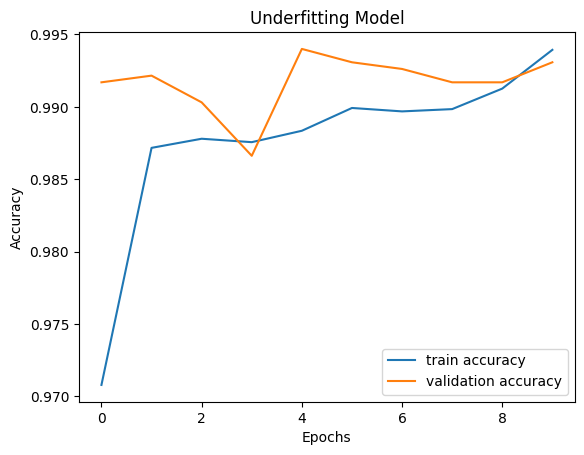

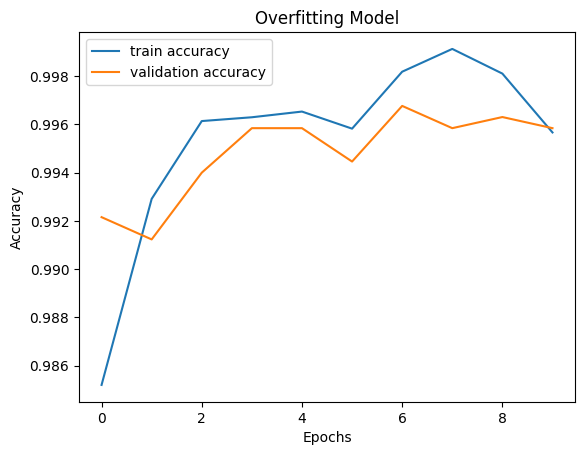

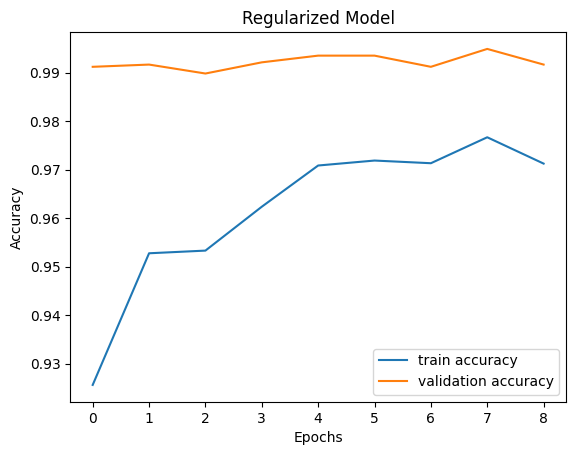

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history_underfit, "Underfitting Model")
plot_history(history_overfit, "Overfitting Model")
plot_history(history_regularized, "Regularized Model")


*El modelo regularizado parece tener el mejor rendimiento general, mostrando un buen equilibrio entre ajuste a los datos de entrenamiento y capacidad de generalización.


*El modelo underfiting muestra signos de ser demasiado simple, ya que no logra ajustarse bien ni siquiera a los datos de entrenamiento.


*El modelo overfitting muestra claros signos de memorización de los datos de entrenamiento, lo que resulta en un pobre rendimiento en los datos de validación.

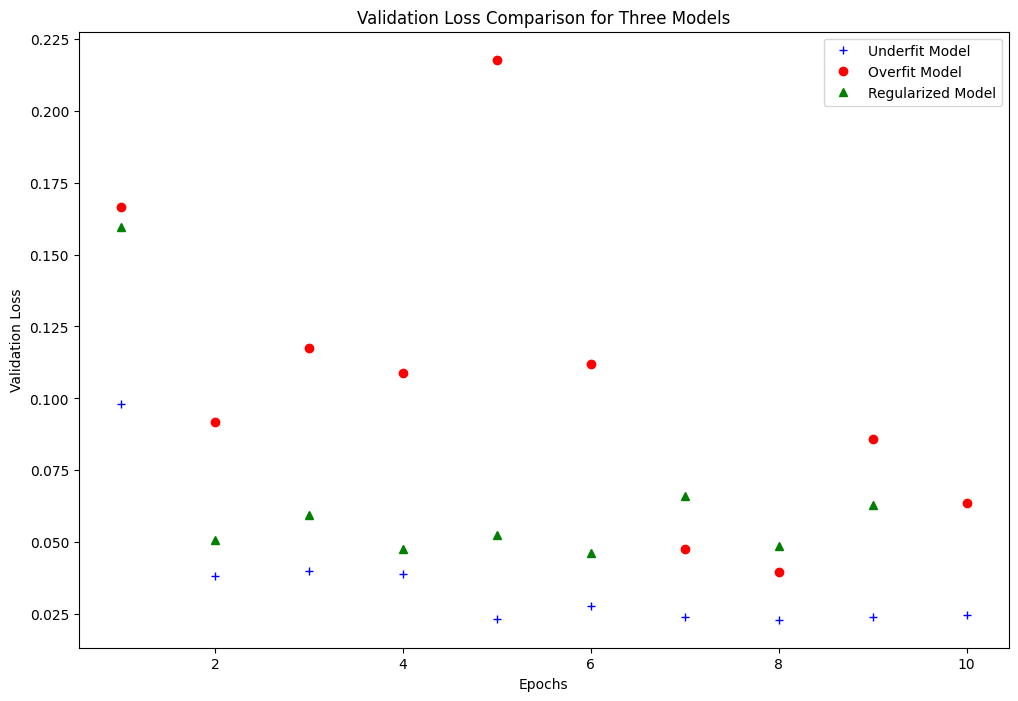

In [ ]:


epochs_underfit_overfit = range(1, 11)  # 10 épocas para underfit y overfit

underfit_val_loss = history_underfit.history['val_loss']
overfit_val_loss = history_overfit.history['val_loss']
regularized_val_loss = history_regularized.history['val_loss']

epochs_regularized = range(1, len(regularized_val_loss) + 1)

plt.figure(figsize=(12, 8))

plt.plot(epochs_underfit_overfit, underfit_val_loss, 'b+', label='Underfit Model')  # Blue plus markers

plt.plot(epochs_underfit_overfit, overfit_val_loss, 'ro', label='Overfit Model')  # Red circle markers

plt.plot(epochs_regularized, regularized_val_loss, 'g^', label='Regularized Model')  # Green triangle markers

# Configurar etiquetas y título
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison for Three Models')
plt.legend()

# Mostrar la gráfica
plt.show()


**Comparación de modelos:**

Underfit Model (azul +):


Su rendimiento estable sugiere que podría beneficiarse de un modelo más complejo.


Overfit Model (rojo •):


Este comportamiento es típico de un modelo sobreajustado que memoriza el conjunto de entrenamiento pero generaliza mal.


Regularized Model (verde ▲):


Parece lograr un mejor equilibrio entre ajuste y generalización.

**Evaluar los modelos:**
medimos la pérdida y la precisión en el conjunto de prueba para los tres modelos.

In [ ]:
# modelo con underfitting
test_loss_underfit, test_accuracy_underfit = underfit_model.evaluate(x_test, y_test)
print(f"Underfitting Model - Test Loss: {test_loss_underfit}, Test Accuracy: {test_accuracy_underfit}")

# modelo con overfitting
test_loss_overfit, test_accuracy_overfit = overfit_model.evaluate(x_test, y_test)
print(f"Overfitting Model - Test Loss: {test_loss_overfit}, Test Accuracy: {test_accuracy_overfit}")

# modelo regularizado
test_loss_regularized, test_accuracy_regularized = regularized_model.evaluate(x_test, y_test)
print(f"Regularized Model - Test Loss: {test_loss_regularized}, Test Accuracy: {test_accuracy_regularized}")


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9894 - loss: 0.0304
Underfitting Model - Test Loss: 0.024811970070004463, Test Accuracy: 0.9930779933929443
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9952 - loss: 0.0707
Overfitting Model - Test Loss: 0.06354910880327225, Test Accuracy: 0.9958468079566956
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9905 - loss: 0.0495
Regularized Model - Test Loss: 0.06300222873687744, Test Accuracy: 0.9916935563087463


**Predicciones**

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Predictions for Underfitting Model:


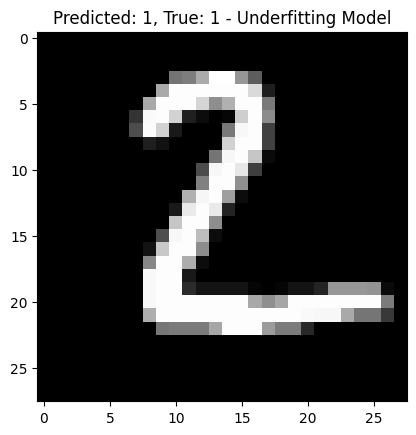

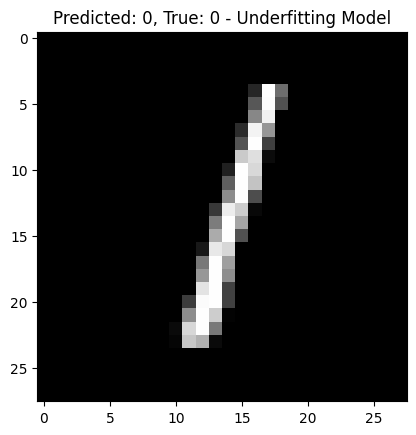

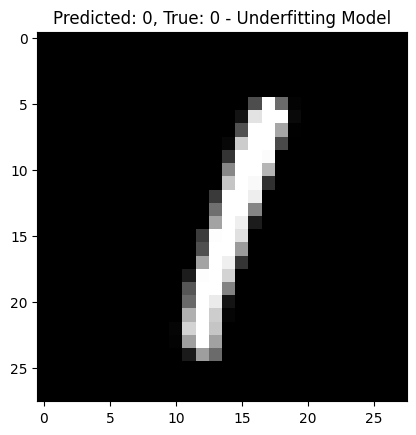

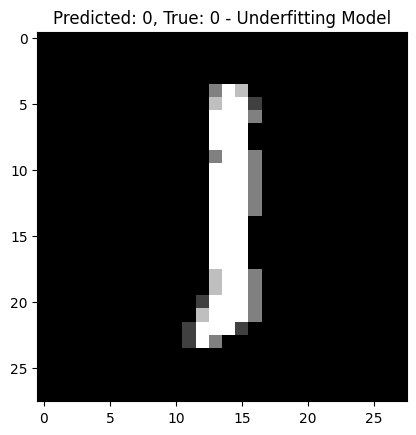

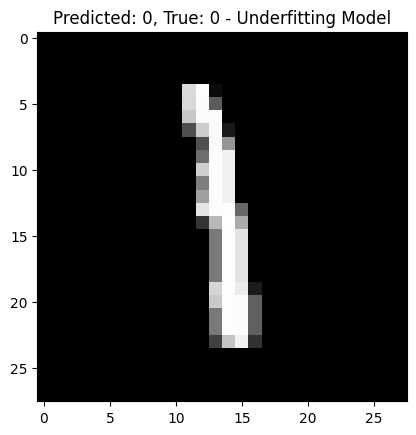

Predictions for Overfitting Model:


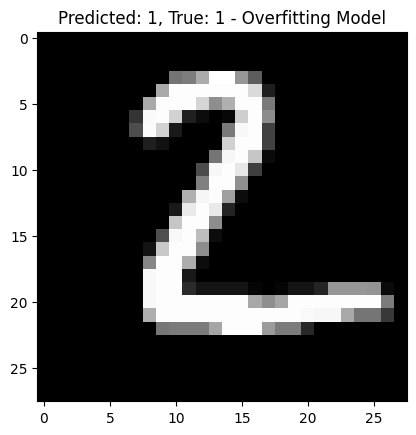

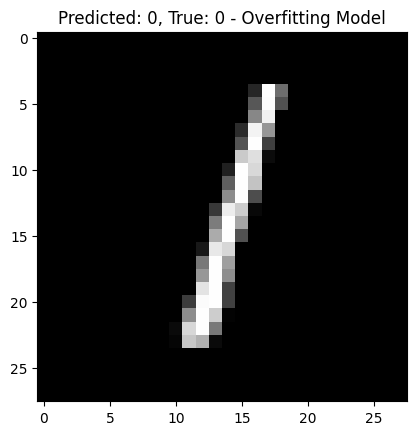

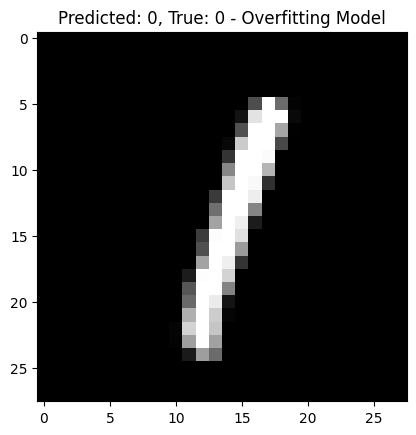

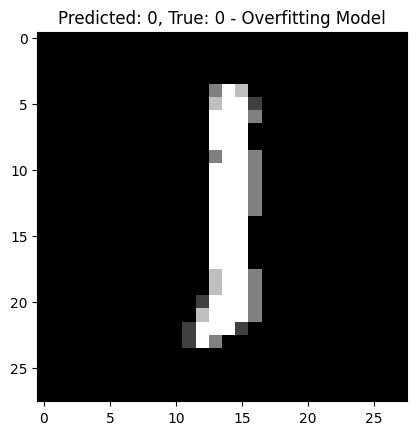

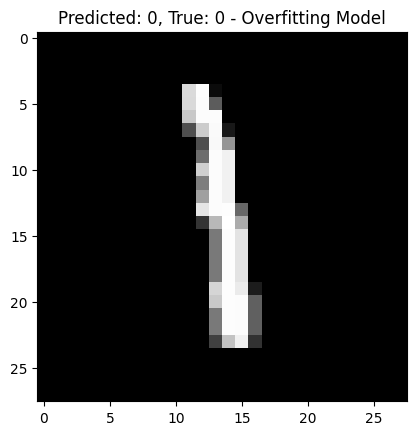

Predictions for Regularized Model:


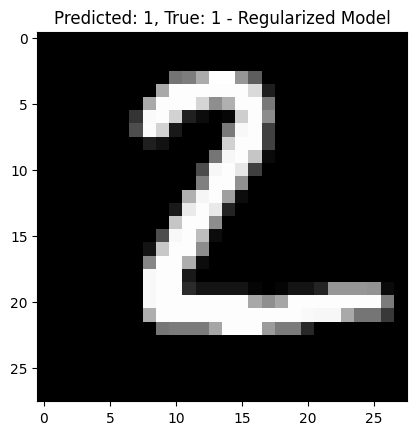

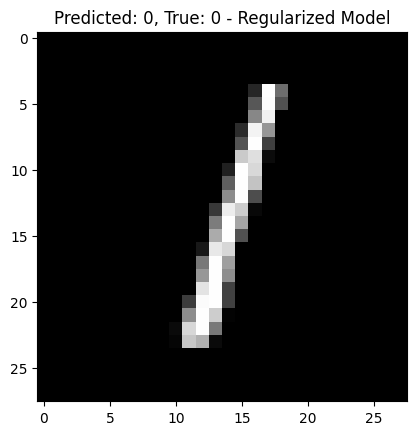

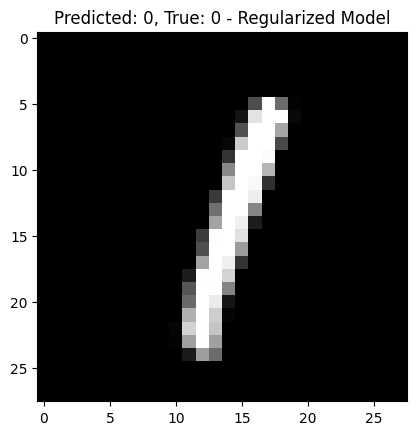

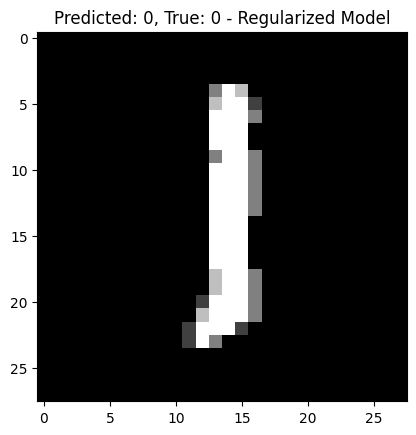

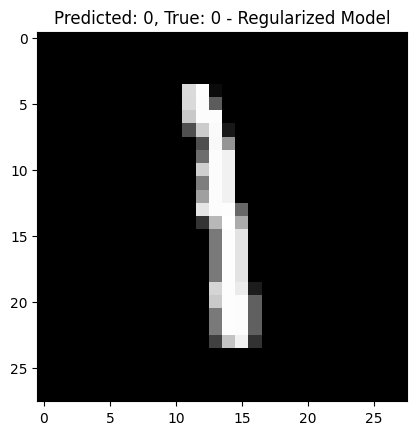

In [ ]:
#  modelo underfit
predictions_underfit = underfit_model.predict(x_test)

#  modelo overfit
predictions_overfit = overfit_model.predict(x_test)

#  modelo regularizado
predictions_regularized = regularized_model.predict(x_test)

# primeras 5 predicciones de cada modelo
def show_comparison(x_test, y_test, predictions, model_name, n=5):
    print(f"Predictions for {model_name}:")
    for i in range(n):
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        predicted_label = np.round(predictions[i][0])
        true_label = y_test[i]
        plt.title(f"Predicted: {int(predicted_label)}, True: {int(true_label)} - {model_name}")
        plt.show()

# Comparar predicciones
show_comparison(x_test, y_test, predictions_underfit, "Underfitting Model")
show_comparison(x_test, y_test, predictions_overfit, "Overfitting Model")
show_comparison(x_test, y_test, predictions_regularized, "Regularized Model")


**L2 regularización para el modelo regularizado**

In [ ]:
from tensorflow.keras import  regularizers

l2_regularized_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Aplanar las imágenes de entrada
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization added
    layers.Dropout(0.5),  # Regularization with Dropout (50%)
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization added
    layers.Dropout(0.5),  # Regularization with Dropout (50%)
    layers.Dense(1, activation='sigmoid')  # Capa de salida con una neurona y activación sigmoide
])

l2_regularized_model.compile(optimizer='adam',
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

history_l2_regularized = l2_regularized_model.fit(x_train, y_train,
                                                  epochs=20,
                                                  validation_data=(x_test, y_test),
                                                  callbacks=[early_stopping])

Epoch 1/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8912 - loss: 5.5729 - val_accuracy: 0.9908 - val_loss: 0.2759
Epoch 2/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9610 - loss: 0.5258 - val_accuracy: 0.9931 - val_loss: 0.2201
Epoch 3/20
397/397 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9751 - loss: 0.3328 - val_accuracy: 0.9949 - val_loss: 0.1611


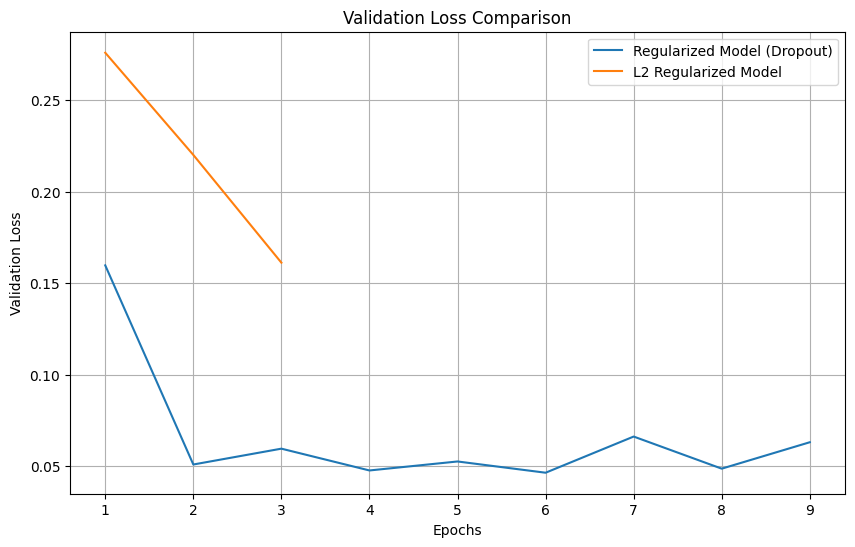

In [ ]:
epochs = range(1, len(regularized_val_loss) + 1)  # Use the length of the shorter array

# Extract validation loss values
regularized_val_loss = history_regularized.history['val_loss']
l2_regularized_val_loss = history_l2_regularized.history['val_loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, regularized_val_loss, label='Regularized Model (Dropout)')

# Ensure l2_regularized_val_loss is not empty and adjust epochs accordingly
if l2_regularized_val_loss:
  epochs_l2 = range(1, len(l2_regularized_val_loss) + 1)
  plt.plot(epochs_l2, l2_regularized_val_loss, label='L2 Regularized Model')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.grid(True)
plt.show()